# Beam under tensile loading
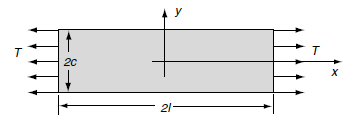

In [1]:
from cartesianUtilities import *
from IPython.display import Math, Latex

In [2]:
A10, A20, A11, A01, A02, A00 = sp.symbols('A10, A20, A11, A01, A02, A00')
T = sp.Symbol('T')

Initially we assume a stress function, $\phi$ which involves all quadratic and lower order terms. However later we may drop several constants depending upon our requirements.

In [3]:
phi = A10*x + A20*x**2 + A11*x*y + A01*y + A02*y**2 + A00
display(Math('\phi(x,y) = {}'.format(sp.latex(phi))))

<IPython.core.display.Math object>

In [4]:
sigmaxx = sigma_xx(phi)
sigmayy = sigma_yy(phi)
sigmaxy = sigma_xy(phi)

display(Math('\sigma_{{xx}} = {}'.format(sp.latex(sigmaxx))))
display(Math('\sigma_{{yy}} = {}'.format(sp.latex(sigmayy))))
display(Math('\sigma_{{xy}} = {}'.format(sp.latex(sigmaxy))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Since we require $\sigma_{yy}$ and $\sigma_{xy}$ to be zero at all points, we have to set $A_{20}$ and $A_{11}$ as 0. Moreover all constants except $A_{02}$ turn out to be useless in stress field computations, hence we drop them as well.

In [5]:
phi = phi.subs([(A00,0),(A01,0),(A10,0),(A11,0),(A20,0)])
display(Math('\phi = {}'.format(sp.latex(phi))))

<IPython.core.display.Math object>

In [6]:
sigmaxx = sigma_xx(phi)
sigmayy = sigma_yy(phi)
sigmaxy = sigma_xy(phi)

display(Math('\sigma_{{xx}} = {}'.format(sp.latex(sigmaxx))))
display(Math('\sigma_{{yy}} = {}'.format(sp.latex(sigmayy))))
display(Math('\sigma_{{xy}} = {}'.format(sp.latex(sigmaxy))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The boundary condition states that $\sigma_{xx}=T$ at all points, where T is the tension applied at the ends. Other stress components $\sigma_{yy}$ and $\sigma_{xy}$ is 0 at all points.

In [7]:
eq = sp.Eq(sigmaxx,T)
display(eq)
sol = sp.solve(eq,A02)

Eq(2*A02, T)

In [8]:
phi_constant = sol[0]
phi = phi.subs(A02,phi_constant)
display(Math('\phi = {}'.format(sp.latex(phi))))

<IPython.core.display.Math object>

In [9]:
sigmaxx = sigma_xx(phi)
sigmayy = sigma_yy(phi)
sigmaxy = sigma_xy(phi)

display(Math('\sigma_{{xx}} = {}'.format(sp.latex(sigmaxx))))
display(Math('\sigma_{{yy}} = {}'.format(sp.latex(sigmayy))))
display(Math('\sigma_{{xy}} = {}'.format(sp.latex(sigmaxy))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
epsilonxx = epsilon_xx(sigmaxx, sigmayy)
epsilonyy = epsilon_yy(sigmayy, sigmaxx)
epsilonxy = epsilon_xy(sigmaxy)

display(Math('\epsilon_{{xx}} = {}'.format(sp.latex(epsilonxx))))
display(Math('\epsilon_{{yy}} = {}'.format(sp.latex(epsilonyy))))
display(Math('\epsilon_{{xy}} = {}'.format(sp.latex(epsilonxy))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
u = sp.Function('u')(x,y)
v = sp.Function('v')(x,y)
f1= sp.Function('f1')(y)
f2= sp.Function('f2')(x)

u = sp.integrate(epsilonxx,x) + f1
v = sp.integrate(epsilonyy,y) + f2

display(Math('u(x,y) = {}'.format(sp.latex(u))))
display(Math('v(x,y) = {}'.format(sp.latex(v))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
lhs = sp.diff(u,y) + sp.diff(v,x)
rhs = epsilonxy
eq = sp.Eq(lhs,rhs)
display(eq)

Eq(Derivative(f1(y), y) + Derivative(f2(x), x), 0)

In [13]:
C = sp.Symbol('C')

eq1 = sp.Eq(sp.diff(f1,y),-C)
f1_sol = sp.dsolve(eq1)
display(Math('{}'.format(sp.latex(f1_sol))))

eq2 = sp.Eq(sp.diff(f2,x),C)
f2_sol = sp.dsolve(eq2)
display(Math('{}'.format(sp.latex(f2_sol))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [14]:
f1 = -C*y
f2 = C*x

u = sp.integrate(epsilonxx,x) + f1
v = sp.integrate(epsilonyy,y) + f2

display(Math('u(x,y) = {}'.format(sp.latex(u))))
display(Math('v(x,y) = {}'.format(sp.latex(v))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>